Develop a model to find the variables that are significant in the demand for shared bikes with the available independent asedrfytui89variables and report appropriate metrics of your model evaluation.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('../Datasets/sharedBikeDemand.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
df.drop(columns=['instant', 'dteday'], inplace=True)

In [8]:
df = pd.get_dummies(df, columns=['season', 'mnth', 'weathersit', 'weekday', 'yr', 'holiday', 'workingday'], drop_first=True)

In [9]:
X = df.drop(columns=['cnt', 'casual', 'registered'])
y = df['cnt']

In [11]:
X = X.apply(pd.to_numeric, errors='coerce')

In [17]:
df.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
       'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weathersit_2', 'weathersit_3', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'yr_1', 'holiday_1',
       'workingday_1'],
      dtype='object')

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

In [22]:
print("Linear Regression Metrics:")
print("R² Score:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linear Regression Metrics:
R² Score: 0.859018389136996
MAE: 533.2671713236838
RMSE: 694.6637851450898


In [23]:
lasso = Lasso(alpha=0.01)  # Adjust alpha for feature selection strength
lasso.fit(X_train_scaled, y_train)
selected_features = X.columns[lasso.coef_ != 0]
print("Selected Features by Lasso:", selected_features)

Selected Features by Lasso: Index(['temp', 'atemp', 'hum', 'windspeed', 'season_2', 'season_3', 'season_4',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weathersit_2',
       'weathersit_3', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'yr_1', 'holiday_1', 'workingday_1'],
      dtype='object')


c:\Users\njak4\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.092e+05, tolerance: 2.228e+05
  model = cd_fast.enet_coordinate_descent(


In [24]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [25]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("Top Features by Random Forest:")
print(feature_importance.head(10))

Top Features by Random Forest:
         Feature  Importance
0           temp    0.357624
26          yr_1    0.267509
1          atemp    0.167584
2            hum    0.058991
6       season_4    0.039292
3      windspeed    0.034845
19  weathersit_3    0.018458
4       season_2    0.006236
18  weathersit_2    0.005907
15       mnth_10    0.004258


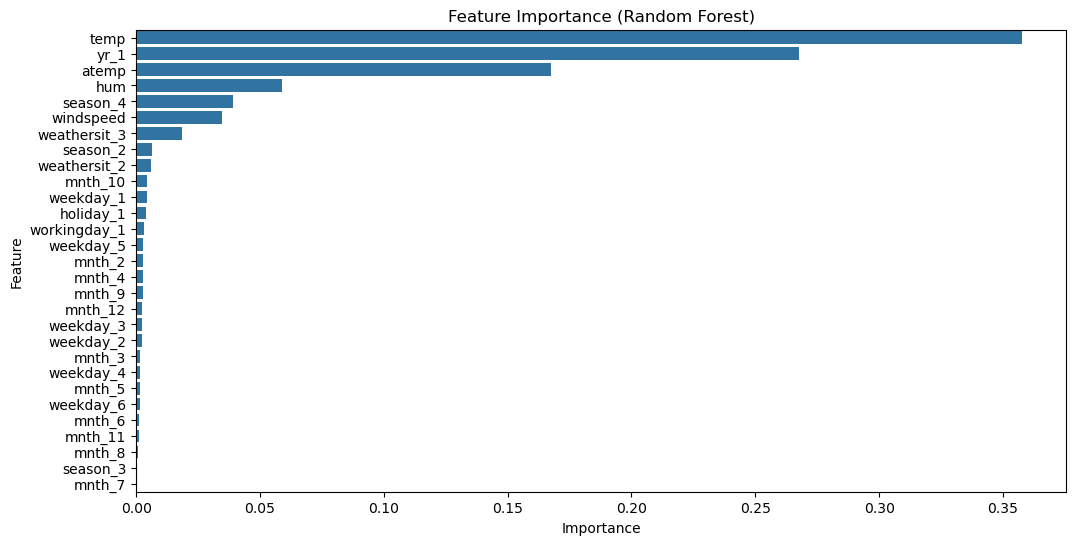

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance['Importance'], y=feature_importance['Feature'])
plt.title('Feature Importance (Random Forest)')
plt.show()
